In [7]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plots we will create

#Read in the data
df = pd.read_csv(r'C:\Users\onehu\Downloads\movie project\movies.csv')



In [8]:
# let's check out the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [13]:
# let's see if there's any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [14]:
# Looking at data types for our columns

df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [22]:
#Change the data type for the following columns**USE "df = df.fillna(0) to fill NaN Values"

df = df.fillna(0)

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')



In [23]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life      0      Drama  2020   
7664                                     Dream Round      0     Comedy  2020   
7665                                   Saving Mbango      0      Drama  2020   
7666                                    It's Just Us      0      Drama  2020   
7667                                       Tee em el      0     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    0.0        0.0    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663          0                          0     90.0  
7664          0  Cactus Blue Entertainment     90.0  
7665          0           Embi Productions      0.0  
7666          0                          0    120.0  
7667          0                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [53]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [28]:
#Showing the entire dataset
pd.set_option('display.max_rows', None)

In [39]:
#drop any duplicates

df['company'].drop_duplicates()


0                                            Warner Bros.
1                                       Columbia Pictures
2                                               Lucasfilm
3                                      Paramount Pictures
4                                          Orion Pictures
6                                      Universal Pictures
7                            Chartoff-Winkler Productions
8                                          Dovemead Films
9                                          United Artists
10                                    The Malpaso Company
11                                           C.A.T. Films
14                                      Filmways Pictures
15                                        Rastar Pictures
16                              Metro-Goldwyn-Mayer (MGM)
17                                              IPC Films
18                                  AVCO Embassy Pictures
20                             Lorimar Film Entertainment
21            

In [ ]:
# Budget high correlation
# Company high Correlation

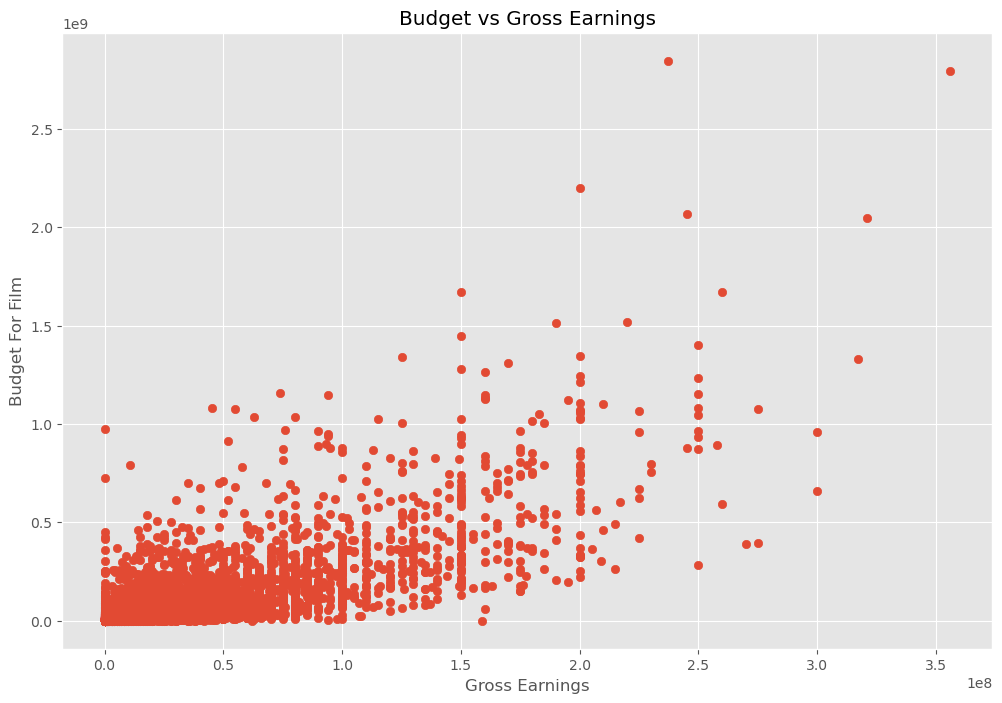

In [42]:
# Scatter plot w/ budget vs gross, Adding main title and subtitles to x and y axis
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')


plt.show()




In [43]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

<AxesSubplot:xlabel='budget', ylabel='gross'>

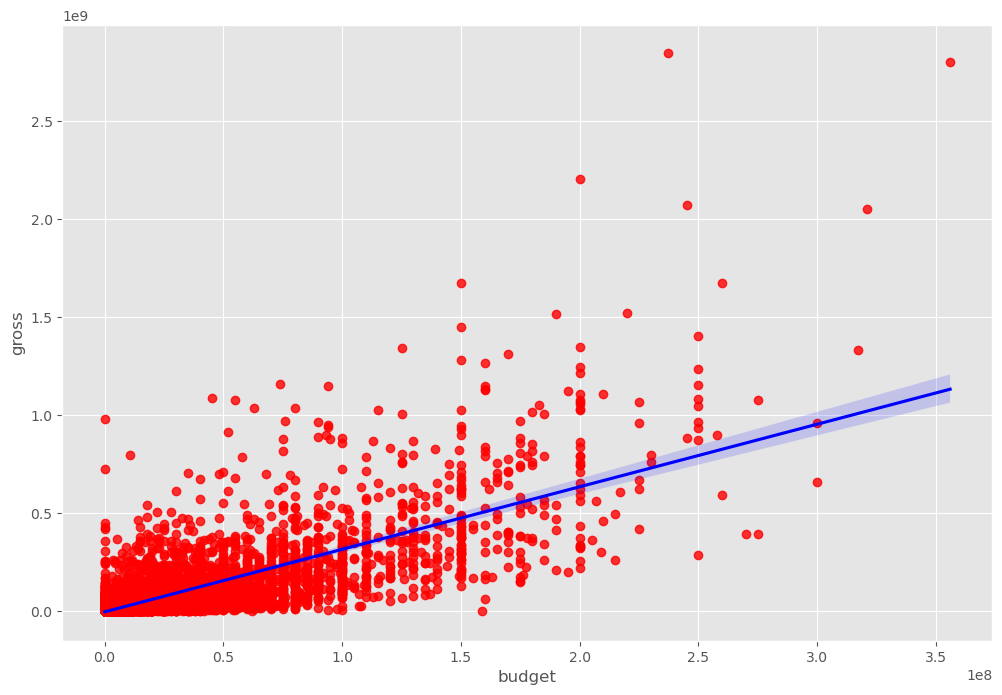

In [46]:
# Will Plot same figures using Seaborn

sns.regplot(x ='budget', y ='gross', data = df, scatter_kws={"color": "red"} , line_kws = {"color": "blue"})

In [48]:
#looking at correlation

df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.092616  0.222427  0.309212  0.261900  0.116358
score    0.092616  1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.222427  0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.309212  0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.261900  0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.116358  0.394564  0.306984  0.268372  0.244339  1.000000

In [ ]:
#High correlation between budget and gross
#I was right!!! Using Heatmap vvv

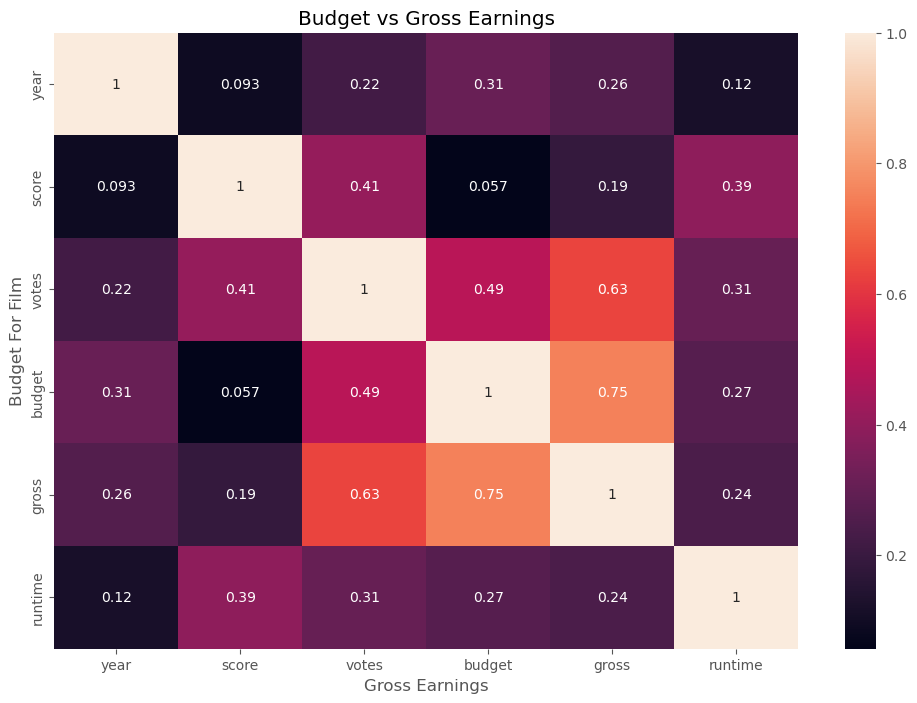

In [50]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget For Film')

plt.show()

In [51]:
# Look at Company
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

In [52]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
0     6587       7      6  1980      1706    8.4   927000.0      2589    4015   
1     5573       7      1  1980      1493    5.8    65000.0      2269    1633   
2     5142       5      0  1980      1772    8.7  1200000.0      1111    2568   
3      286       5      4  1980      1493    7.7   221000.0      1301    2001   
4     1027       7      4  1980      1544    7.3   108000.0      1054     522   
5     2109       7     10  1980      2503    6.4   123000.0      2528    4363   
6     5574       7      0  1980      1772    7.9   188000.0      1412     839   
7     4436       7      3  1980       700    8.2   330000.0      1829    1770   
8     5281       5      0  1980      1754    6.8   101000.0      2306    1980   
9     6213       7      3  1980      2287    7.0    10000.0      2864     424   
10     463       5      0  1980       675    6.1    18000.0       357    3986   
11    5920       5      1  1980      2988    7.3    54000.0      1199    1833   
12    4315       5      1  1980       627    5.3    30000.0      2352    2334   
13    4084       7      6  1980      3212    7.7    49000.0      2388    2328   
14    1687       7      5  1980      1544    7.1    37000.0       318     521   
15    5024       5      6  1980      3022    7.2    27000.0      1243    3549   
16    1900       7      6  1980      2287    6.6    21000.0        49     736   
17      92       5      4  1980       700    6.9    29000.0       514    3263   
18    5865       7     10  1980      1109    6.8    66000.0      1374    2105   
19    5189       7      4  1980       627    6.8    26000.0      2561     557   
20    1387       7      5  1980       946    6.5    20000.0      2891    4452   
21    2451       7      1  1980       161    6.8    14000.0      1892    2927   
22    5845       5      0  1980       282    6.7    22000.0       744    4193   
23    7445       5      8  1980       586    5.3    12000.0      2371    3529   
24    7127       5      6  1980      1914    6.4    14000.0      1153      13   
25     346       7     10  1980       774    6.9    33000.0      1583    3235   
26    3263       7      4  1980      2060    6.5     5100.0      2433    2484   
27    4442       5      0  1980       282    5.0     4100.0      1282      34   
28     980       7      5  1980      1772    7.2    17000.0      2673    4387   
29     362       7      5  1980       887    6.2    22000.0      2151    3327   
30    3796       5      4  1980      3297    7.1     8900.0      2811      84   
31    4373       7     10  1980      1468    5.4    16000.0      2143    4456   
32    4987       5      0  1980       343    5.3    15000.0      1041    1588   
33    1103       5      6  1980       161    6.1      604.0      1644     959   
34    4785       5      4  1980       700    6.7     9100.0      1225    3137   
35    4362       7      4  1980      2819    6.2    24000.0      1091    3108   
36    6008       7      4  1980      2453    6.3     4300.0       855    1359   
37    3721       7      4  1980      2966    6.0    11000.0      1598    3643   
38    6102       5      6  1980       700    5.9     4000.0      2296    3827   
39    1244       5      3  1980      2196    7.5    17000.0      1884    4202   
40    6748       5      7  1980      3102    6.3     5700.0      1403     519   
41     927       5      6  1980      1589    7.9    13000.0       335    2253   
42    6644       7      0  1980      1837    7.1     9000.0      2314    2544   
43    7305       7      3  1980       170    6.6    11000.0       186    1683   
44    5504       7     10  1980      3043    4.8     2000.0      1978     152   
45    1152       7      4  1980      1468    6.1    12000.0      2804    4299   
46    6094       7      0  1980      1706    5.3     3900.0      1934    3358   
47    5578       7     10  1980      2776    4.6     3900.0      2836    4345   
48    6360       5      0  1980      

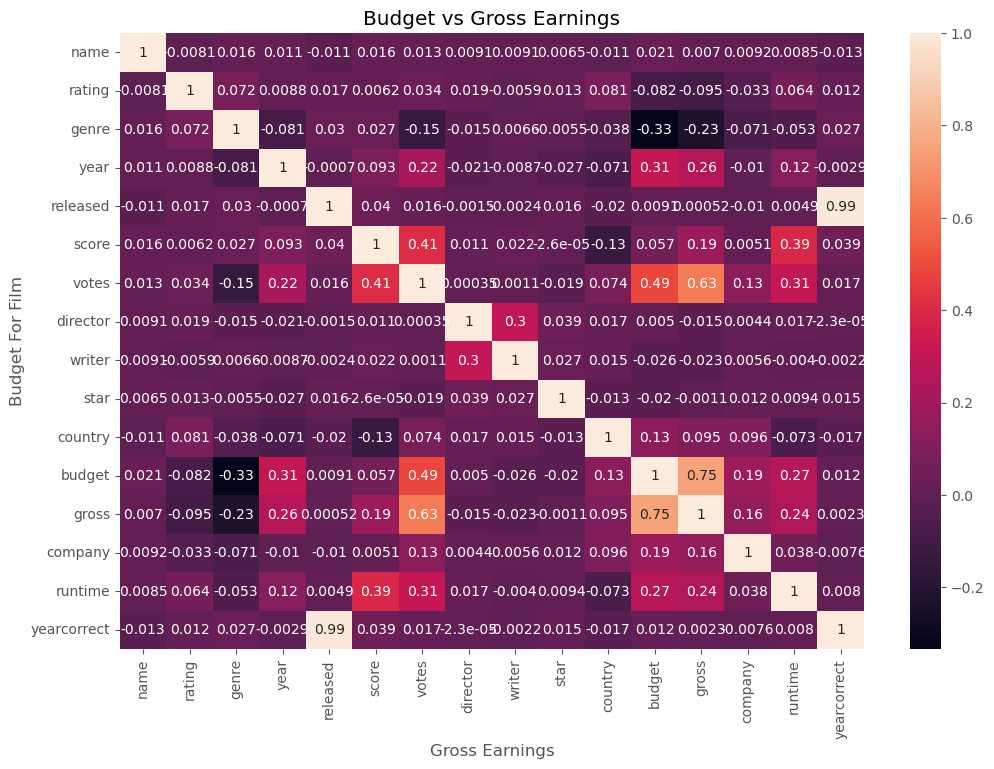

In [54]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget For Film')

plt.show()

In [55]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.016377   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613  0.006192   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027384   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.092616   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.039814   
score        0.016377  0.006192  0.027384  0.092616  0.039814  1.000000   
votes        0.013038  0.033743 -0.145296  0.222427  0.015878  0.407101   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.010568   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.022098   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.000026   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133346   
budget       0.020548 -0.081939 -0.334021  0.309212  0.009145  0.056863   
gross        0.006989 -0.095450 -0.234297  0.261900  0.000519  0.186012   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.005081   
runtime      0.008483  0.064133 -0.052914  0.116358  0.004852  0.394564   
yearcorrect -0.013132  0.012429  0.027305 -0.002885  0.994590  0.038923   

                votes  director    writer      star   country    budget  \
name         0.013038  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating       0.033743  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre       -0.145296 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year         0.222427 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released     0.015878 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score        0.407101  0.010568  0.022098 -0.000026 -0.133346  0.056863   
votes        1.000000  0.000349  0.001127 -0.019146  0.073525  0.486931   
director     0.000349  1.000000  0.299067  0.039234  0.017490  0.004976   
writer       0.001127  0.299067  1.000000  0.027245  0.015343 -0.025911   
star        -0.019146  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country      0.073525  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget       0.486931  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross        0.632870 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company      0.133457  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime      0.306984  0.017062 -0.004036  0.009418 -0.073319  0.268372   
yearcorrect  0.016978 -0.000023 -0.002235  0.015330 -0.017117  0.011545   

                gross   company   runtime  yearcorrect  
name         0.006989  0.009211  0.008483    -0.013132  
rating      -0.095450 -0.032943  0.064133     0.012429  
genre       -0.234297 -0.071067 -0.052914     0.027305  
year         0.261900 -0.010431  0.116358    -0.002885  
released     0.000519 -0.010474  0.004852     0.994590  
score        0.186012  0.005081  0.394564     0.038923  
votes        0.632870  0.133457  0.306984     0.016978  
director    -0.014916  0.004404  0.017062    -0.000023  
writer      -0.022997  0.005646 -0.004036    -0.002235  
star        -0.001129  0.012442  0.009418     0.015330  
country      0.095325  0.095548 -0.073319    -0.017117  
budget       0.750157  0.186474  0.268372     0.011545  
gross        1.000000  0.156745  0.244339     0.002322  
company      0.156745  1.000000  0.037537    -0.007622  
runtime      0.244339  0.037537  1.000000     0.007999  
yearcorrect  0.002322 -0.007622  0.007999     1.000000

In [56]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.016377
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.008483
             yearcorrect   -0.013132
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score          0.006192
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [59]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

budget       genre         -0.334021
genre        budget        -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
votes        genre         -0.145296
genre        votes         -0.145296
country      score         -0.133346
score        country       -0.133346
rating       gross         -0.095450
gross        rating        -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
year         genre         -0.081261
genre        year          -0.081261
runtime      country       -0.073319
country      runtime       -0.073319
company      genre         -0.071067
genre        company       -0.071067
country      year          -0.070938
year         country       -0.070938
genre        runtime       -0.052914
runtime      genre         -0.052914
genre        country       -0.037615
country      genre         -0.037615
company      rating        -0.032943
rating       company       -0.032943
star         year          -0.027242
y

In [60]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.632870
votes        gross          0.632870
budget       gross          0.750157
gross        budget         0.750157
yearcorrect  released       0.994590
released     yearcorrect    0.994590
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and Budget had the highest correlation, the bigger the budget, the better the movies perform on a grand scale!!!